# Tweepy
Standard Twitter API limits search to the recent 7 days

In [41]:
import tweepy
import configparser
import datetime

In [33]:
config = configparser.ConfigParser()
config.read('../twitter_api/config.ini')

['../twitter_api/config.ini']

In [35]:
#loading the keys
api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

In [86]:
#authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [70]:
username = 'elonmusk'
startDate = datetime.datetime(2022, 5, 1, 0, 0, 0)
endDate =   datetime.datetime(2022, 5, 7, 0, 0, 0)

In [71]:
startDate.date()

datetime.date(2022, 5, 1)

In [72]:
tweets = []
tmpTweets = api.user_timeline(screen_name=username)
for tweet in tmpTweets:
#     print(tweet.created_at)
#     break
    if tweet.created_at.timestamp() < endDate.timestamp() and tweet.created_at.timestamp() > startDate.timestamp():
        tweets.append(tweet)

In [94]:
#get who elonmusk is following
i=0
for friend in tweepy.Cursor(api.get_friends, screen_name=username).items(10):
    i+=1
    print(i,friend.screen_name)

1 jgebbia
2 georgesoros
3 historydefined
4 neuralink
5 beeple
6 Grimezsz
7 thesheetztweetz
8 EvaFoxU
9 planet
10 Teslarati


# snscrape (Python wrapper)
snscrape is good for scraping historical tweets. It uses Twitter's advanced search. Searching parameters can be found here: https://github.com/igorbrigadir/twitter-advanced-search

In [9]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
pd.set_option('display.max_colwidth', None)

### Tweets by user

In [78]:
maxTweets = 100

tweets_list = []

In [80]:
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:elonmusk').get_items()):
    if i>maxTweets:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])

In [81]:
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [82]:
tweets_df

,Datetime,Tweet Id,Text,Username
0,2022-05-07 21:05:01+00:00,1523046265097158656,@SawyerMerritt Yes! Stop the outrageous false ...,elonmusk
1,2022-05-07 21:02:09+00:00,1523045544536723456,"@WholeMarsBlog At risk of stating the obvious,...",elonmusk
2,2022-05-07 16:57:16+00:00,1522983920341594112,@lexfridman How to find secret doors in Elden ...,elonmusk
3,2022-05-07 12:37:25+00:00,1522918526520070144,"Also, work ethic expectations would be extreme...",elonmusk
4,2022-05-07 11:47:14+00:00,1522905896040423425,@DavidSacks Sage advice in this thread …,elonmusk
...,...,...,...,...
96,2022-04-30 02:03:44+00:00,1520222336703598593,@PPathole @pmarca A friend just emailed me abo...,elonmusk
97,2022-04-30 01:47:28+00:00,1520218243922751488,@PPathole @pmarca I have not heard bad things ...,elonmusk
98,2022-04-30 01:19:21+00:00,1520211168979259393,@pmarca Wellbutrin is way worse than Adderall ...,elonmusk
99,2022-04-30 00:04:28+00:00,1520192322511724544,@WilliamShatner You will always be my Captain,elonmusk


### Tweets by text search

In [122]:
from tqdm import tqdm

In [152]:
keywords = [
            '#TwitterTakeOver', '#ElonMusk', '#ElonMuskTwitter',
            '#ElonMuskBuysTwitter', '@elonmusk', 'Elon Musk', '#Twitter',
           ]

In [153]:
#tweets from when Elon made the offer on April 14th 2022m
#1000 tweets for each keyword, ~8000 tweets in total

maxTweets = 1000
startdate='2022-04-14'
enddate='2022-04-16'

tweets_dic1={}

for keyword in tqdm(keywords):
    tweets_list = []
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper('{} since:{} until:{}'.format(keyword,startdate,enddate)).get_items()):
        if i>maxTweets:
            break
        tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, keyword])
    
    tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Keyword'])
    tweets_dic1[keyword]=tweets_df

100%|████████████████████████████████████████████| 7/7 [04:04<00:00, 34.95s/it]


In [239]:
tweets041422=pd.concat(list(tweets_dic1.values())[:-1])  #dropping the #Twitter hashtag since most of it is irrelavent
tweets041422.drop_duplicates(subset=['Tweet Id'], inplace=True)
tweets041422.reset_index(drop=True, inplace=True)

In [240]:
tweets041422

,Datetime,Tweet Id,Text,Username,Keyword
0,2022-04-15 23:59:40+00:00,1515117687642509315,Elon Musk’s speaking to investors who could partner with to buy Twitter\n\n#TwitterTakeover #ElonMuskTwitter https://t.co/LwkyEtojRm,TitterTakeover,#TwitterTakeOver
1,2022-04-15 23:59:35+00:00,1515117663781101577,Egos battle \n\n@mcuban @elonmusk #TwitterTakeover https://t.co/akFhtHUI4S,depressedinthe1,#TwitterTakeOver
2,2022-04-15 23:59:35+00:00,1515117663625826310,@BabyTrumpfan @seanhannity @Jim_Jordan @ClayTravis he shld be trying to fix that #Tesla that stopped on its own the other day #TwitterTakeover,LOVNLA,#TwitterTakeOver
3,2022-04-15 23:59:22+00:00,1515117610098114565,#TwitterTakeover by Musk opposed by the woke employees that are working for this current owner . https://t.co/v0ArTlFuY6,CBenetau,#TwitterTakeOver
4,2022-04-15 23:58:15+00:00,1515117330694561798,And they say Elon Musk is the problem..\n\n#TwitterTakeover #Elon #Musk #ElonMuskTwitter #poisonpill #TwitterTakeover #Corrupt https://t.co/IP586tHaVw,DrivingOnEmptyx,#TwitterTakeOver
...,...,...,...,...,...
3793,2022-04-15 23:54:42+00:00,1515116435286155267,queremos que todo el mundo sea libre menos rusia xq lo odio. elon musk,marcelitaokk,Elon Musk
3794,2022-04-15 23:54:40+00:00,1515116429540007939,Elon Musk is a greedy A$$hole,Stevenmwright05,Elon Musk
3795,2022-04-15 23:54:40+00:00,1515116428055171082,"If Elon Musk is successful in buying Twitter, would you stay or would you go?",SansonJag,Elon Musk
3796,2022-04-15 23:54:39+00:00,1515116421654597637,"Saudi Prince Gives Elon Musk Problems, So He STRIKES Back With 2 Simple ... https://t.co/Kf0bii5eH2 via @YouTube",lifeasitgoes12,Elon Musk


In [156]:
#tweets from when Twitter accepted Elon's offer
#1000 tweets for each keyword, ~8000 tweets in total

maxTweets = 1000
startdate='2022-04-25'
enddate='2022-04-27'

tweets_dic2={}

for keyword in tqdm(keywords):
    tweets_list = []
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper('{} since:{} until:{}'.format(keyword,startdate,enddate)).get_items()):
        if i>maxTweets:
            break
        tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, keyword])
    
    tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Keyword'])
    tweets_dic2[keyword]=tweets_df
    

100%|████████████████████████████████████████████| 7/7 [04:04<00:00, 34.89s/it]


In [241]:
tweets042522 = pd.concat(list(tweets_dic2.values())[:-1]) #dropping the #Twitter hashtag since most of it is irrelavent
tweets042522.drop_duplicates(subset=['Tweet Id'], inplace=True)
tweets042522.reset_index(drop=True, inplace=True)

In [242]:
tweets042522

,Datetime,Tweet Id,Text,Username,Keyword
0,2022-04-26 23:59:51+00:00,1519103999030579200,"You know, instead of all the tweets of ""Elon Musk should end world hunger""\nYou should be asking why couldn't the world's governments solve it in the first place..\n""If you want to get rid of lung cancer, get rid of the lung.""\n#ElonMusk #TwitterTakeover #leavingtwitter",whatisKhaiki,#TwitterTakeOver
1,2022-04-26 23:59:16+00:00,1519103853324611584,Pssstttt I have a secret …. Turns out @elonmusk donated $5.7B dollars to end world hunger shhhhhhh don’t tell the left. Here’s the article. \n\nhttps://t.co/oJKlLxq7I0\n\n#TwitterTakeover,CoshJoulter,#TwitterTakeOver
2,2022-04-26 23:59:04+00:00,1519103801571135489,Twitter take over😂\n\n@elonmusk the kung fu is strong in you💪\n\n#Memes #Memesdaily #TwitterTakeover #Twitter #ChampionsLeague https://t.co/Th2tPq18JY,MrSotAman1,#TwitterTakeOver
3,2022-04-26 23:58:56+00:00,1519103769321033728,To the people who are so worked up about how @elonmusk chooses to spend his billions - just wait until you learn how the United States Government spends YOURS… 🤫 #twittersold #TwitterTakeover #TwitterCEO #ElonMusk,soitweetyeah76,#TwitterTakeOver
4,2022-04-26 23:58:39+00:00,1519103694809100288,President Trump's next tweet; the world's most awaited comeback.\n#TwitterTakeover #TRUMPBACKONTWITTER,dialecticum,#TwitterTakeOver
...,...,...,...,...,...
4723,2022-04-26 23:58:43+00:00,1519103713125806081,Mr Elon Musk for president 🤔🤔 https://t.co/BdLTqhRT46,consuleduc,Elon Musk
4724,2022-04-26 23:58:43+00:00,1519103712098201601,"""You could run a Hyperloop through the vacuum that is Elon Musk's knowledge of civics. A Dragon spacecraft could safely float in the void that is Elon Musk's understanding of the cultural and legal labyrinth of expression and identity in a free society.""🔥\nhttps://t.co/k1AsTP6aVZ",heymrbrad,Elon Musk
4725,2022-04-26 23:58:42+00:00,1519103707954176000,Elon Musk would have the world trade excessive dependence on Russian oil for total dependence on Chinese batteries.,LGKatzPhD,Elon Musk
4726,2022-04-26 23:58:41+00:00,1519103706674958336,"If Elon #Musk starts charging for your #Twitter account, are you staying or leaving Twitter ??? 😎",BMW_Borger,Elon Musk


In [258]:
#new set of keywords for control
keywords2 = [
            '#ElonMusk', 
            '@elonmusk',
            'Elon Musk'
           ]

In [259]:
#tweets about Elon from a year ago as control
#1000 tweets for each keyword, ~8000 tweets in total

maxTweets = 1000
startdate='2021-04-05'
enddate='2021-04-07'

tweets_dic3={}

for keyword in tqdm(keywords2):
    tweets_list = []
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper('{} since:{} until:{}'.format(keyword,startdate,enddate)).get_items()):
        if i>maxTweets:
            break
        tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, keyword])
    
    tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Keyword'])
    tweets_dic3[keyword]=tweets_df

100%|████████████████████████████████████████████| 3/3 [01:56<00:00, 38.91s/it]


In [260]:
tweets040521 = pd.concat(list(tweets_dic3.values()))
tweets040521.drop_duplicates(subset=['Tweet Id'], inplace=True)
tweets040521.reset_index(drop=True, inplace=True)

In [3]:
import pickle

In [261]:
#saving files as pickles

with open('tweets_dic1.pkl', 'wb') as handle:
    pickle.dump(tweets_dic1, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('tweets_dic2.pkl', 'wb') as handle:
    pickle.dump(tweets_dic2, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('tweets041422.pkl', 'wb') as handle:
    pickle.dump(tweets041422, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('tweets042522.pkl', 'wb') as handle:
    pickle.dump(tweets042522, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('tweets_dic3.pkl', 'wb') as handle:
    pickle.dump(tweets_dic3, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('tweets040521.pkl', 'wb') as handle:
    pickle.dump(tweets040521, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
with open(r"tweets040521.pkl", "rb") as input_file:
    tweets040521 = pickle.load(input_file)

with open(r"tweets041422.pkl", "rb") as input_file:
    tweets041422 = pickle.load(input_file)

with open(r"tweets042522.pkl", "rb") as input_file:
    tweets042522 = pickle.load(input_file)

# Sentiment analysis using VADER

In [6]:
from cleantext import clean
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [7]:
#cleaning special characters from text
tweets041422['CleanedText'] = tweets041422['Text'].\
        map(lambda x: clean(x, lower=False, no_line_breaks=True, no_urls=True))
tweets041422['VADER_Compound'] = tweets041422['Text'].\
        map(lambda x: analyzer.polarity_scores(x)['compound'])

tweets042522['CleanedText'] = tweets042522['Text'].\
        map(lambda x: clean(x, lower=False, no_line_breaks=True, no_urls=True))
tweets042522['VADER_Compound'] = tweets042522['Text'].\
        map(lambda x: analyzer.polarity_scores(x)['compound'])

tweets040521['CleanedText'] = tweets040521['Text'].\
        map(lambda x: clean(x, lower=False, no_line_breaks=True, no_urls=True))
tweets040521['VADER_Compound'] = tweets040521['Text'].\
        map(lambda x: analyzer.polarity_scores(x)['compound'])

In [265]:
#all tweets about the Elon twitter buyout
tweets041422.loc[:,'VADER_Compound'].mean()

0.09417985781990522

In [266]:
#all tweets about the Elon twitter buyout
tweets042522.loc[:,'VADER_Compound'].mean()

0.12520541455160744

In [271]:
#tweets about Elon Musk only
tweets041422[tweets041422.loc[:,'Keyword'].isin(keywords2)].loc[:,'VADER_Compound'].mean()

0.11340235178833905

In [272]:
#tweets about Elon Musk only
tweets042522[tweets042522.loc[:,'Keyword'].isin(keywords2)].loc[:,'VADER_Compound'].mean()

0.11558720763723149

In [267]:
#tweets about Elon Musk only (control)
tweets040521.loc[:,'VADER_Compound'].mean()

0.18077880794701986

In [11]:
#sample postive tweets right after the buyout was accepted
tweets042522.sort_values(by=['VADER_Compound'], ascending=False)[['CleanedText','VADER_Compound']].head(5)

,CleanedText,VADER_Compound
1313,Love this! #ElonMusk #ElonMuskBuyTwitter #freedom #FreeSpeech Free bird alas! 💙 💙💙💙💙 <URL>,0.9874
4086,"@Kegan545 @mcgregorgirl1 @blitzer850 @Static_Waste @JimGagnon6 @jbsparky_2010 @Chopstress @DavidMAGAUSA @BVR58915778 @iamajax @KVincentWoods @ubwhoub @martuk56 @ShoumanZoe @Anti_Liberal3 @HappyCycler @chillpill1 @Sandmann143 @CNS15141 @tonykimble4 @ScreamngEagle @Bubbaflaco @IslesfaninFla @SandraSBreen @WasJimbo @Zegdie @elonmusk @American2Jr I did but to much drama, made me dislike the ppl I disliked even more😂😂😂😂😂😂😂😂😂😂",0.9863
4060,@laurenboebert @elonmusk You're the biggest Karen of them all 🤣🤣 #PerjuryTraitorGreene is also a huge Karen but she isn't here right now. I'm sure you'll have no problem covering for her while she's gone 🤣🤣🤣🤣,0.9816
3150,"Listen to ""Podcast Episode 3 Are you Truly Happy? If not, How to Find your Joy?"" by Find Your Positivity Podcast - Coach Danyell. ⚓ <URL> #positivity #Motivation #JOY #meditation #inspirational #podcast #ElonMusk #ElonMuskBuysTwitter",0.9810
3963,"@cafecomferri @elonmusk Sim claro, o bolsonaro ajudou com financiamentos do BNDES.🦄 🤦😂😂😂😂😂😂😂😂😂😂",0.9799


In [12]:
#sample negative tweets right after the buyout was accepted
tweets042522.sort_values(by=['VADER_Compound'], ascending=False)[['CleanedText','VADER_Compound']].tail(5)

,CleanedText,VADER_Compound
353,Democrats: YoUr FrEe SpEeCh IsNt UnDeR AtTaCk 🥴🥴🥴🥴🥴. Also Democrats: free speech will ruin #Democracy! We must shut them down before America is destroyed. This is the darkest day in America. 😭😭😭😭😭 #freespeech #ElonMusk #TwitterTakeover #Lololol,-0.9504
2919,"""This is extremely dangerous to OUR democracy"" ""This is extremely dangerous to OUR democracy"" ""This is extremely dangerous to OUR democracy"" ""This is extremely dangerous to OUR democracy"" ""This is extremely dangerous to OUR democracy"" #ElonMusk #ElonMuskBuysTwitter <URL>",-0.9514
2028,"Same as it ever was. Deplatform. Censor. Mob attack. Targeted harassment. Canceling. Getting conservatives fired. Swatting. The ""fun"" has just begun people. The more leftists lose the more violent will be the reaction. 🙄 #MattWalsh #ElonMusk #ElonMuskTwitter #TwitterSold <URL>",-0.9522
3868,"@YourAnonNews @elonmusk Hate speech is illegal, isn't it? Bullying is wrong and should be illegal, growing up in this world is hard enough for kids these days. Terrorist and extremist groups should not be given a platform. False propaganda needs to be removed by social media providers i.e. trump.",-0.9535
2225,"@TIME @billyperrigo WRONG, LIARS! Twitter admin is ALLOWING harassment & bullying of white people including name-calling & projecting false hatred (racism), fueling bigotry by left-wingers who hate anyone Bipartisan OR conservative. That's reverse discrimination. @elonmusk #ElonMuskTwitter",-0.9829


In [287]:
mean041422

,Keyword,VADER_Compound,Date
0,#ElonMusk,0.115171,04/14/22
1,#ElonMuskBuysTwitter,0.412820,04/14/22
2,#ElonMuskTwitter,0.082294,04/14/22
3,#TwitterTakeOver,0.062312,04/14/22
4,@elonmusk,0.119598,04/14/22
5,Elon Musk,0.068326,04/14/22


In [284]:
mean041422 = tweets041422.groupby('Keyword')['VADER_Compound'].mean().reset_index()
mean041422['Date'] = '04/14/22'

In [285]:
mean042522 = tweets042522.groupby('Keyword')['VADER_Compound'].mean().reset_index()
mean042522['Date'] = '04/25/22'

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

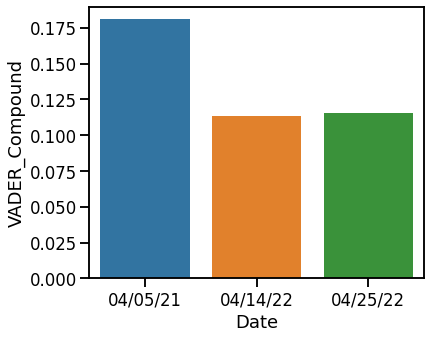

In [323]:
Dates = ['04/05/21','04/14/22', '04/25/22']
elonmean040521 = tweets040521.loc[:,'VADER_Compound'].mean()
elonmean041422 = tweets041422[tweets041422.loc[:,'Keyword'].isin(keywords2)].loc[:,'VADER_Compound'].mean()
elonmean042522 = tweets042522[tweets042522.loc[:,'Keyword'].isin(keywords2)].loc[:,'VADER_Compound'].mean()
values = [elonmean040521, elonmean041422, elonmean042522]
Data = {'x':Dates, 'y':values}

plt.figure(figsize = (6,5))
ax = sns.barplot(x='x', y='y', data = Data)
ax.set(xlabel='Date', ylabel='VADER_Compound')
sns.set_context("talk")

ax.figure.savefig("040521_041422_042522.png",
                      bbox_inches="tight")

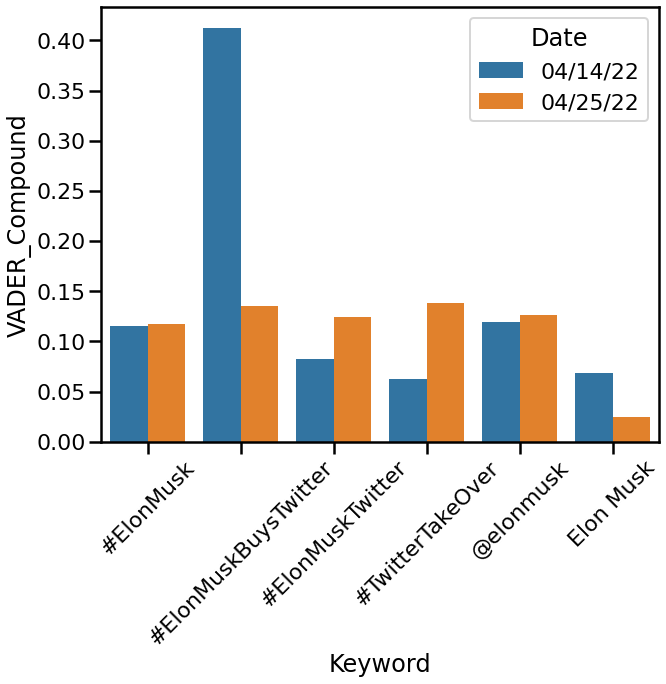

In [318]:
plt.figure(figsize = (10,8))
ax = sns.barplot(x="Keyword", y="VADER_Compound", hue="Date", data=pd.concat([mean041422, mean042522]))
plt.xticks(rotation=45)
sns.set_context("poster")

ax.figure.savefig("041422_042522.png",
                      bbox_inches="tight")